za https://docs.dask.org/en/latest/futures.html

In [3]:
!rm -rf Manna_*.zarr

In [4]:
from dask.distributed import Client

client = Client()  # start local workers as processes

In [5]:
L = [10, 20, 50, 100]
N = int(1e3)
jobs = []
for l in L:
    for i in range(10):
        filename=f"Manna_{l}_{i}.zarr"
        jobs.append(dict(N=int(N), filename=filename, L=int(l)))
jobs

[{'N': 1000, 'filename': 'Manna_10_0.zarr', 'L': 10},
 {'N': 1000, 'filename': 'Manna_10_1.zarr', 'L': 10},
 {'N': 1000, 'filename': 'Manna_10_2.zarr', 'L': 10},
 {'N': 1000, 'filename': 'Manna_10_3.zarr', 'L': 10},
 {'N': 1000, 'filename': 'Manna_10_4.zarr', 'L': 10},
 {'N': 1000, 'filename': 'Manna_10_5.zarr', 'L': 10},
 {'N': 1000, 'filename': 'Manna_10_6.zarr', 'L': 10},
 {'N': 1000, 'filename': 'Manna_10_7.zarr', 'L': 10},
 {'N': 1000, 'filename': 'Manna_10_8.zarr', 'L': 10},
 {'N': 1000, 'filename': 'Manna_10_9.zarr', 'L': 10},
 {'N': 1000, 'filename': 'Manna_20_0.zarr', 'L': 20},
 {'N': 1000, 'filename': 'Manna_20_1.zarr', 'L': 20},
 {'N': 1000, 'filename': 'Manna_20_2.zarr', 'L': 20},
 {'N': 1000, 'filename': 'Manna_20_3.zarr', 'L': 20},
 {'N': 1000, 'filename': 'Manna_20_4.zarr', 'L': 20},
 {'N': 1000, 'filename': 'Manna_20_5.zarr', 'L': 20},
 {'N': 1000, 'filename': 'Manna_20_6.zarr', 'L': 20},
 {'N': 1000, 'filename': 'Manna_20_7.zarr', 'L': 20},
 {'N': 1000, 'filename': 'Ma

In [6]:
def process(kwargs):
    from SOC.models import Manna
    N = kwargs['N']
    L = kwargs['L']
    filename = kwargs['filename']
    m = Manna(L)
    m.save_every = int(N // 2)
    m.run(N, filename)
    return m.values[1:-1,1:-1]
process(dict(N=N, L=48, filename=filename))
!rm -rf Manna_*.zarr

In [7]:
futures =  client.map(process, jobs)
futures

[<Future: pending, key: process-a0b1fa04173cac9a5477e3db6e69634a>,
 <Future: pending, key: process-cf6bddc8fc2c50592b6216ee8d878eea>,
 <Future: pending, key: process-4834b01882c430d481449520aeab4113>,
 <Future: pending, key: process-eed142ecded3e99a275938a147899c0f>,
 <Future: pending, key: process-f4474229f6e1c444e01a6cd4d32484e0>,
 <Future: pending, key: process-368857539b67382a587813ab859dbd7f>,
 <Future: pending, key: process-0e79ff21c29bda22b017a18c0e623e4f>,
 <Future: pending, key: process-c04bf7995aa9d7b11d6317eba559eade>,
 <Future: pending, key: process-73adac0ca9f8c78f2ca5c65dbdc4562d>,
 <Future: pending, key: process-87f7d8f31c1a802f144fd9753155832f>,
 <Future: pending, key: process-af0b3e96620e96b9b2fa0d4525b69027>,
 <Future: pending, key: process-da359ed967c9101c8e47aef4bdb331cf>,
 <Future: pending, key: process-ebedf70885a3ab8ed08c1ed71924fe86>,
 <Future: pending, key: process-538af4d35dbd133bf0b2ecf7facd2419>,
 <Future: pending, key: process-aac74db09ca3259df6bef715422de0

In [10]:
futures[0].result()

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0, 1, 1, 0, 0, 0],
       [1, 1, 0, 1, 0, 1, 1, 0, 0, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 0, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 1, 0, 1],
       [0, 1, 0, 1, 1, 1, 0, 1, 0, 0],
       [1, 1, 0, 1, 1, 0, 1, 0, 0, 1]])

In [11]:
futures

[<Future: finished, type: numpy.ndarray, key: process-a0b1fa04173cac9a5477e3db6e69634a>,
 <Future: finished, type: numpy.ndarray, key: process-cf6bddc8fc2c50592b6216ee8d878eea>,
 <Future: finished, type: numpy.ndarray, key: process-4834b01882c430d481449520aeab4113>,
 <Future: finished, type: numpy.ndarray, key: process-eed142ecded3e99a275938a147899c0f>,
 <Future: finished, type: numpy.ndarray, key: process-f4474229f6e1c444e01a6cd4d32484e0>,
 <Future: finished, type: numpy.ndarray, key: process-368857539b67382a587813ab859dbd7f>,
 <Future: finished, type: numpy.ndarray, key: process-0e79ff21c29bda22b017a18c0e623e4f>,
 <Future: finished, type: numpy.ndarray, key: process-c04bf7995aa9d7b11d6317eba559eade>,
 <Future: finished, type: numpy.ndarray, key: process-73adac0ca9f8c78f2ca5c65dbdc4562d>,
 <Future: finished, type: numpy.ndarray, key: process-87f7d8f31c1a802f144fd9753155832f>,
 <Future: finished, type: numpy.ndarray, key: process-af0b3e96620e96b9b2fa0d4525b69027>,
 <Future: finished, t

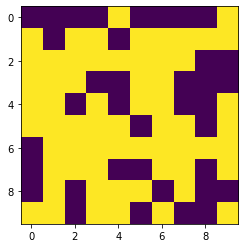

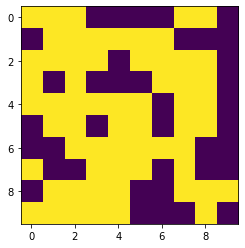

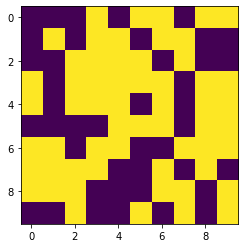

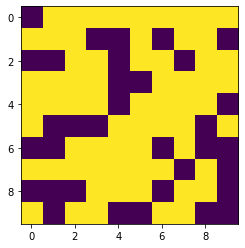

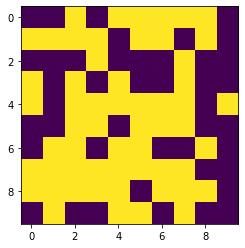

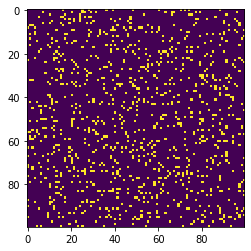

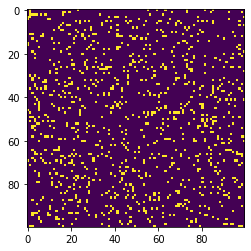

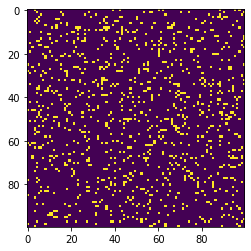

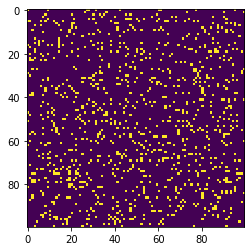

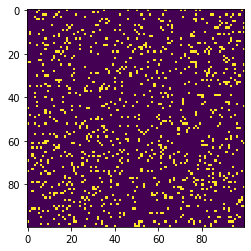

In [12]:
for f in futures[:5]:
    plt.figure()
    plt.imshow(f.result())
for f in futures[-5:]:
    plt.figure()
    plt.imshow(f.result())